## Loading Dataset

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/file/d/1Dy6f6qE29D_gyZL57KZ2xpPanWvD7gLQ'

In [3]:
fluff, id = link.split('d/')
print (id) 

1Dy6f6qE29D_gyZL57KZ2xpPanWvD7gLQ


In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GalaxyZoo1_DR_table2.csv')  


## Importing Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

## Reading and Cleaning Data

In [6]:
#Reading the data
zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [7]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

## Checking imbalance in data

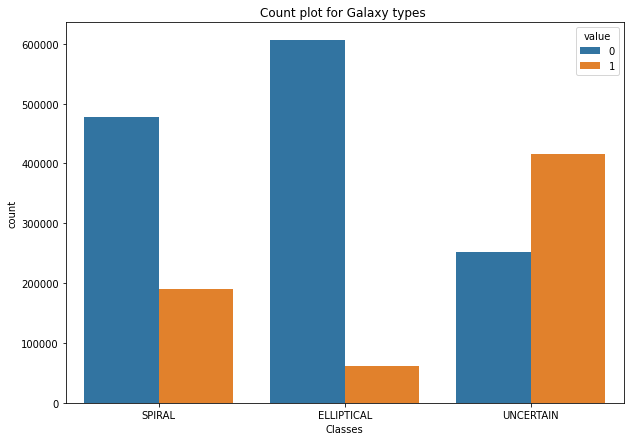

In [8]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

## Splitting the Data

In [9]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Neural Networks for Galaxy Classification Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import time
from time import perf_counter
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

## Fitting the data into neural network

In [11]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 50s 3ms/step - loss: 0.2794 - accuracy: 0.8803
Epoch 2/20
16699/16699 [==============================] - 47s 3ms/step - loss: 0.2413 - accuracy: 0.8949
Epoch 3/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2324 - accuracy: 0.8979
Epoch 4/20
16699/16699 [==============================] - 28s 2ms/step - loss: 0.2289 - accuracy: 0.8984
Epoch 5/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2266 - accuracy: 0.8990
Epoch 6/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2248 - accuracy: 0.8993
Epoch 7/20
16699/16699 [==============================] - 28s 2ms/step - loss: 0.2229 - accuracy: 0.8996
Epoch 8/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2212 - accuracy: 0.9001
Epoch 9/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2200 - accuracy: 0.9003
Epoch 10/20
16699/16699 [==============================

## Plotting the accuracy

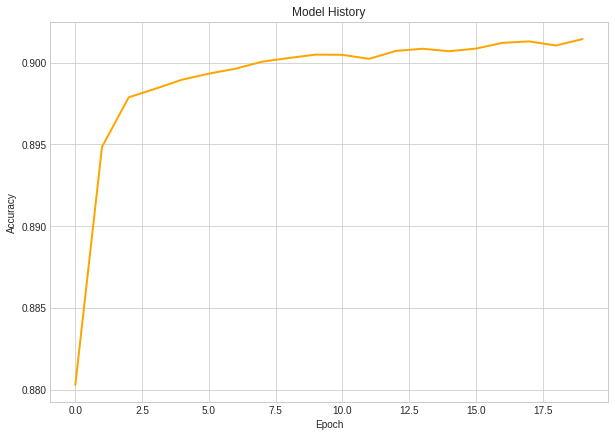

In [12]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

## Printing classification report

In [14]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
temp_pred=model.predict(X_test) 
y_pred=np.argmax(temp_pred,axis=1)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test.argmax(axis=1),y_pred)
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     38281
           1       0.88      0.80      0.84     12554
           2       0.89      0.95      0.92     82754

    accuracy                           0.90    133589
   macro avg       0.90      0.86      0.88    133589
weighted avg       0.90      0.90      0.90    133589

